In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 1. Загрузка данных

In [2]:
california_housing = fetch_california_housing()
data = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
data['MedHouseVal'] = california_housing.target

# 2. Первичный анализ данных


In [3]:
print(data.isnull().sum())
data = data.dropna()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [4]:
scaler = StandardScaler()
data['HouseAge'] = scaler.fit_transform(data[['HouseAge']])

# 3. Разделение выборки

In [5]:
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Обучение модели линейной регрессии

In [8]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

linear_score = linear_model.score(X_test, y_test)
print(f'Linear Regression R²: {linear_score}')

Linear Regression R²: 0.5757877060324508


# 5. Обучение дерева решений

In [30]:
tree_model = DecisionTreeRegressor(
    random_state=42,
    min_samples_split=10,      # Минимальное количество образцов для разделения узла
    min_samples_leaf=5,        # Минимальное количество образцов в листовом узле
    max_leaf_nodes=20,         # Максимальное количество листовых узлов
    max_features='sqrt'        # Используем корень из количества признаков
)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

tree_score = tree_model.score(X_test, y_test)
print(f'Decision Tree R²: {tree_score}')

Decision Tree R²: 0.5127543650121578


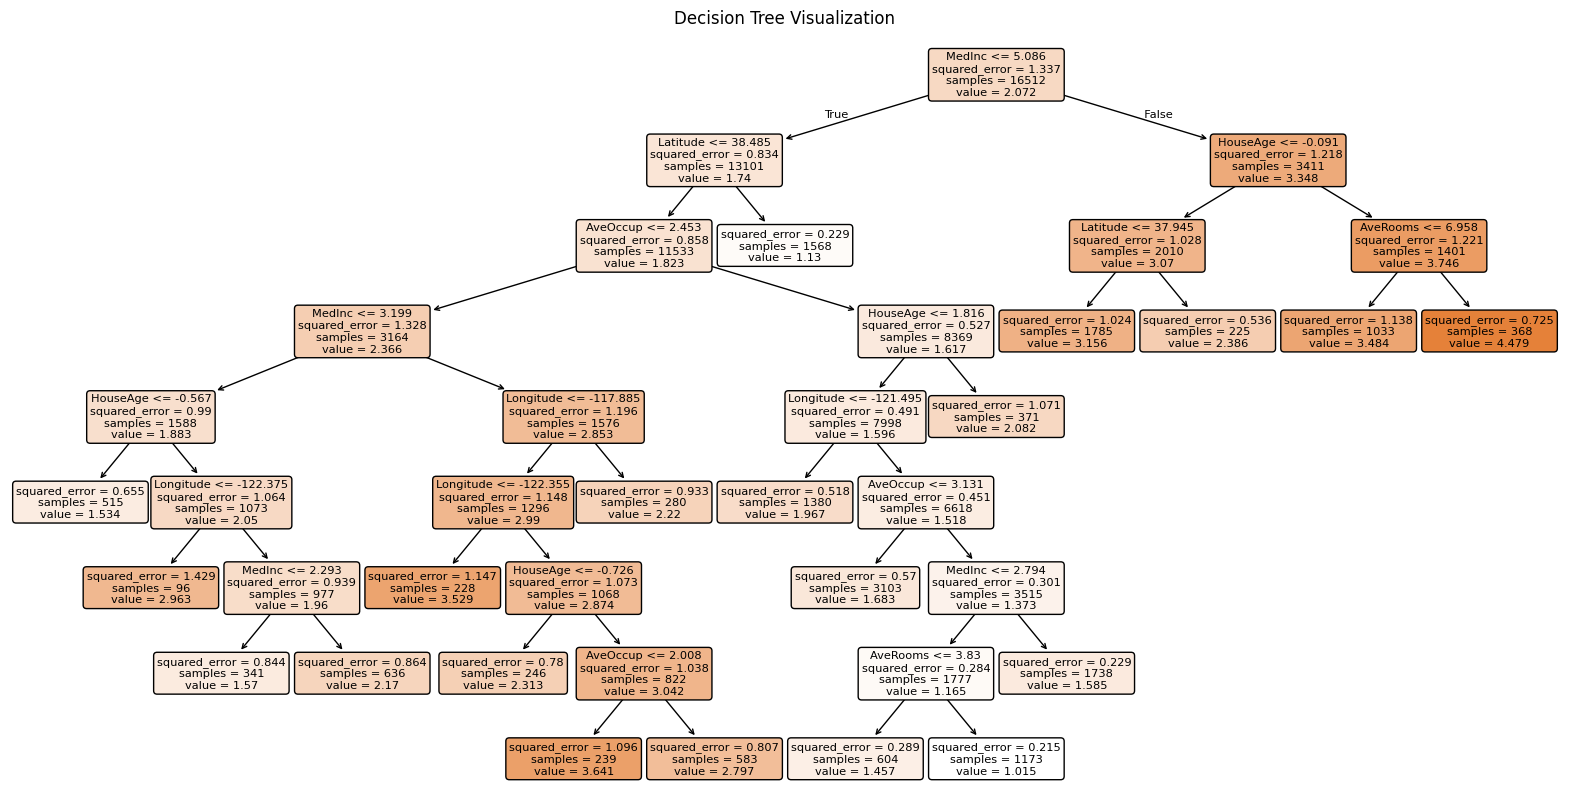

In [31]:
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

# 6. Оптимизация параметров дерева решений

In [32]:
best_score = 0
best_depth = 0
for depth in range(1, 21):
    tree_model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_model.fit(X_train, y_train)
    score = tree_model.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_depth = depth
print(f'Best max_depth: {best_depth}, Best R²: {best_score}')

Best max_depth: 9, Best R²: 0.6832529836308363


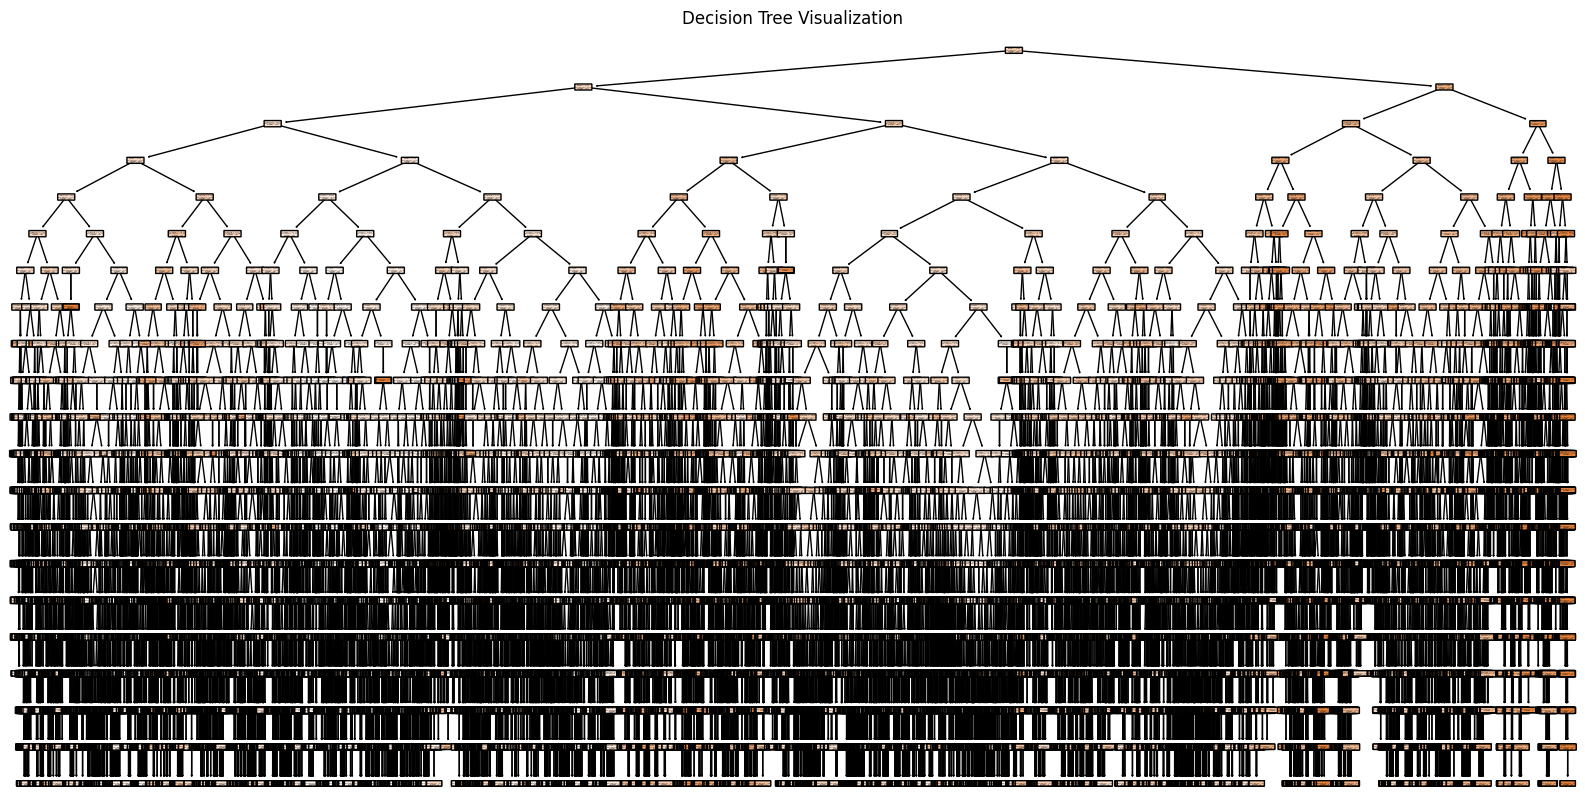

In [33]:
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

# 7. Сравнение точности моделей

In [35]:
print(f'Linear Regression R²: {linear_score}')
print(f'Decision Tree R² (not optimized): {tree_score}')
print(f'Decision Tree R² (optimized): {best_score}')

Linear Regression R²: 0.5757877060324508
Decision Tree R² (not optimized): 0.5127543650121578
Decision Tree R² (optimized): 0.6832529836308363


# Выводы

Линейная регрессия показала более стабильные результаты, но может не справляться с нелинейными зависимостями.
Дерево решений может лучше захватывать сложные зависимости, но может переобучаться, если не оптимизировать параметры, что наглядно видно на сравнении двух графиков выше.